**Kumulační** a korelační techniky pro posílení signálu v šumu


Teorie viz prezenatce na hodině nebo v knize 
- Jiří Jan, Číslicová filtrace, analýza a resturace signálů, 2. vydání, VUTIUM Brno 2002, ISBN 80-214-1558-4



In [1]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt

In [4]:
def mojeFunkce(f,tvec):
    x = np.sin(2*np.pi*f*tvec)
    return np.array(x)

def mojeFsum(Amp,tvec):
    Err = Amp*(2*np.random.rand(tvec.size)-1)
    return np.array(Err)

10000


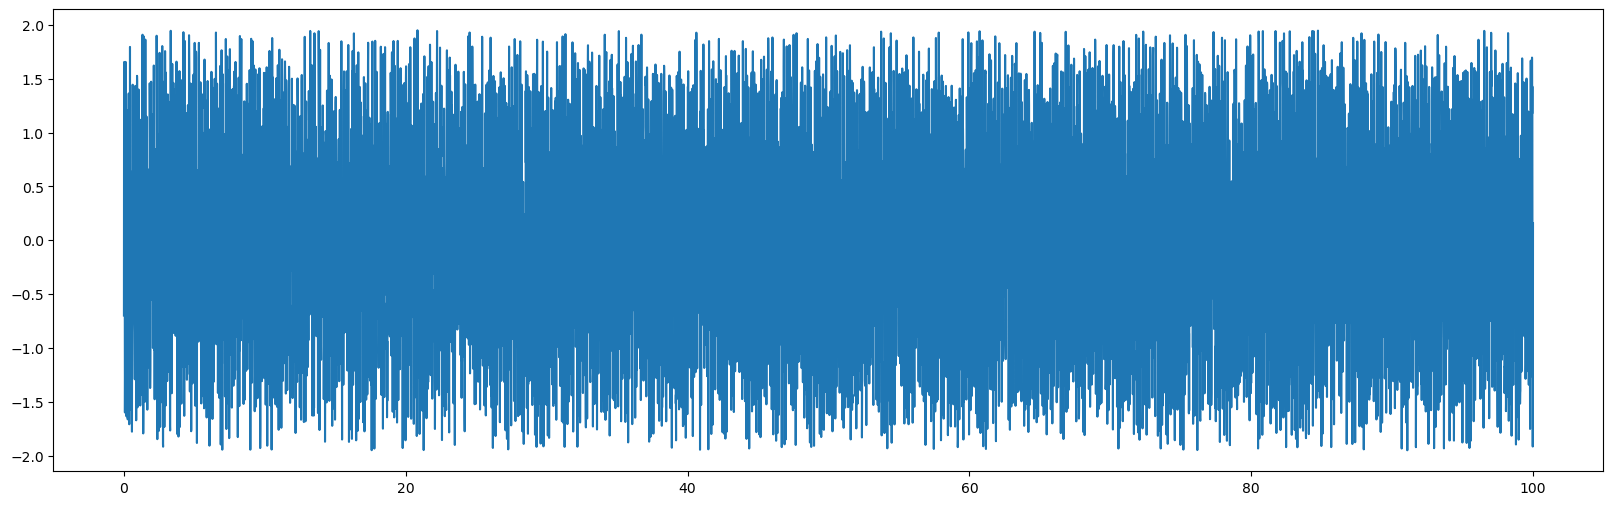

In [9]:
Amp=1.0;

numT=10000;
f = 10;
A0=1.0;
T=1/f;
Tmax = numT*T;

n_length = int(numT*f);

tvec = np.linspace(0,Tmax,n_length, endpoint=False);
print(tvec.size)

mojeF = mojeFunkce(f,tvec) + mojeFsum(Amp,tvec)

plt.rcParams["figure.figsize"] = (20,6)
#plt.plot(tvec,mojeF);

Kumulace vzorků s rovnoměrnými váhami
$$x_l = \sum_{i=1}^M a_i x_{m_iT}l \rightarrow a_i=\frac{1}{M}$$

Poměr zlepšení signálu k šumu 

$$K_x = \frac{\sum_{i=1}^M a_i}{\sqrt{ \sum_{i=1}^M a_i^2 }}$$

10


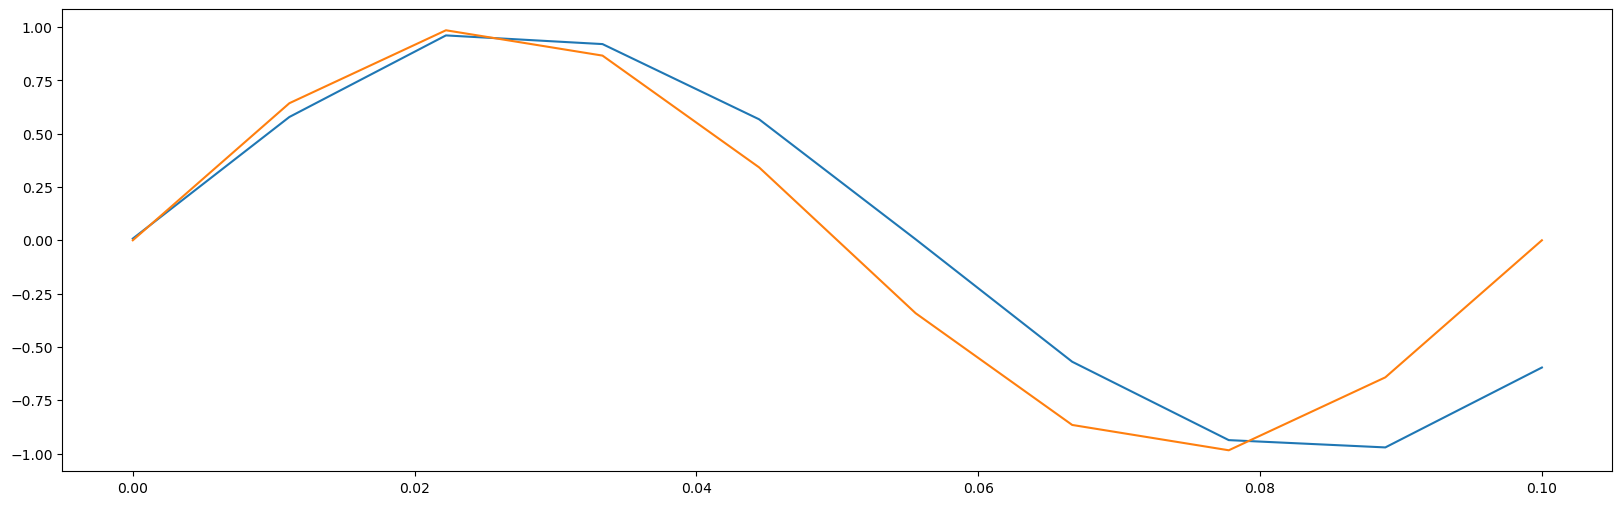

In [10]:
# knowledge of sampling and frequency gives us the number of samples in one period
OnePer=int(n_length/numT)
#reshape field and plot the individual periods

Periods= np.reshape(mojeF,[numT,OnePer])
""""
for i in range(1,numT+1):
    plt.subplot(numT,1,i)
    plt.plot(Periods[i-1,:])
    plt.show()
"""
#acumulate samples into single avAvSignal=np.sum(Periods,axis=0); # sum only
AvSignal = np.sum(Periods,axis=0);
AvSignal /=numT
print(OnePer)

Tone=np.linspace(0,T,OnePer)
plt.plot(Tone,AvSignal);
plt.plot(Tone,mojeFunkce(f,Tone));

Proveďte kumulační techniku pro posílení signálu v šumu pro signál s neznámou periodiou 
- pomocí vhodné techniky zjistěte jednu periodu signálu
- proveďte kumulaci s rovnoměrnými váhami
- **proveďte kumulaci s klesající váhou (např. $q=0.9802$)**

$$x_l = \sum_{i=1}^M a_i x_{m_iT}l \rightarrow a_i=q^i$$

500000


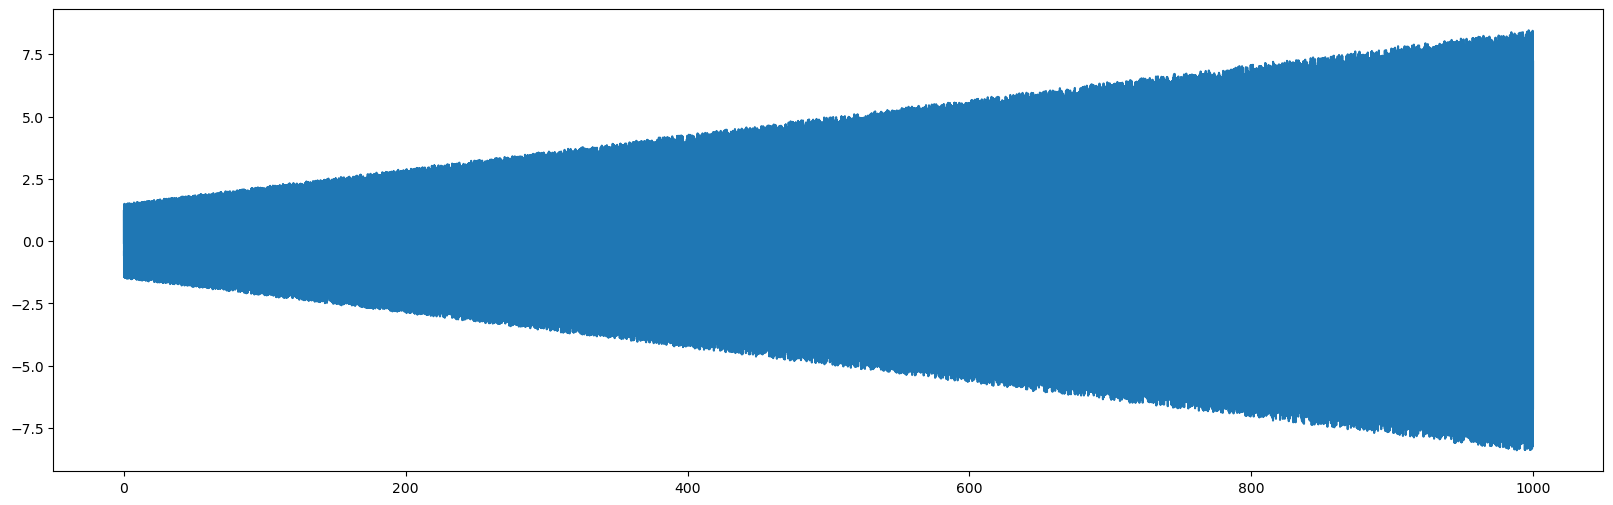

In [5]:
#generate signal with increasing noise

def mojeFsumIncrease(Amp, tvec):
    Ampvals = np.linspace(Amp,Amp*15, tvec.size);
    Err = Ampvals*(2*np.random.rand(tvec.size)-1)
    return np.array(Err)

n_length = 500000;
Amp=0.5;

numT=10000;
f = 10;
A0=1.0;
T=1/f;
Tmax = numT*T;

tvec = np.linspace(0,Tmax,n_length, endpoint=False);
print(tvec.size)

mojeF = mojeFunkce(f,tvec) + mojeFsumIncrease(Amp,tvec)

plt.rcParams["figure.figsize"] = (20,6)
plt.plot(tvec,mojeF);

50


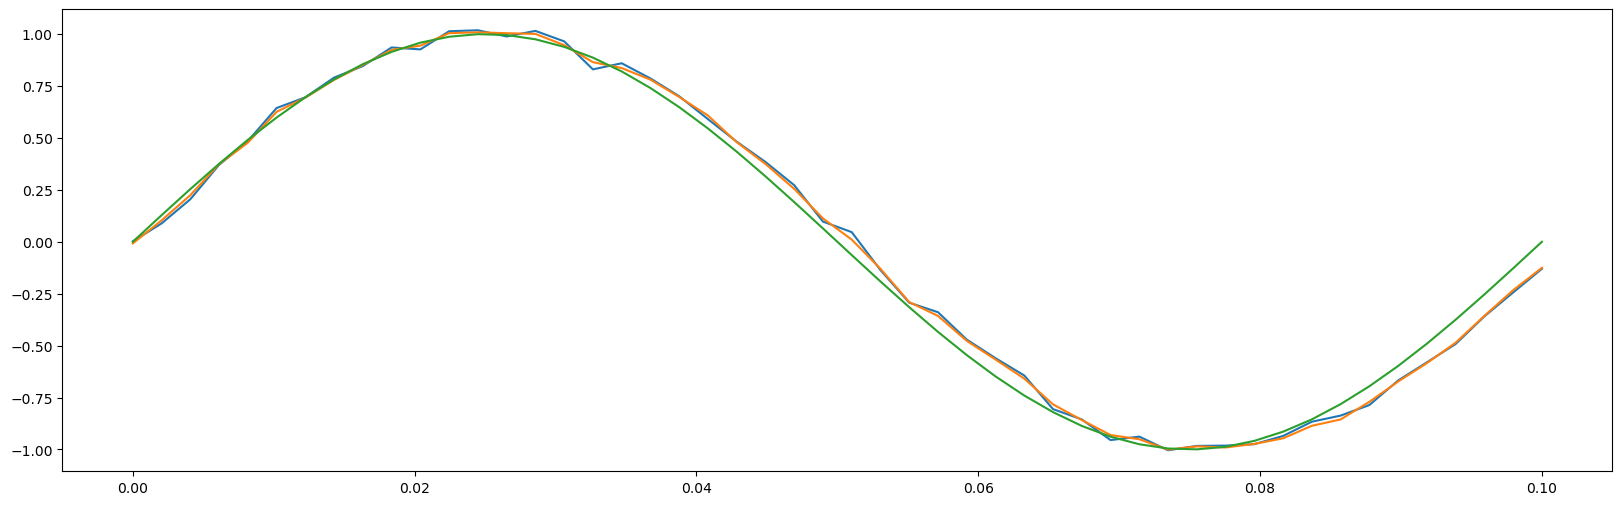

In [25]:
# knowledge of sampling and frequency gives us the number of samples in one period
OnePer=int(n_length/numT)
#reshape field and plot the individual periods

Periods= np.reshape(mojeF,[numT,OnePer])
""""
for i in range(1,numT+1):
    plt.subplot(numT,1,i)
    plt.plot(Periods[i-1,:])
"""

#acumulate samples into single avAvSignal=np.sum(Periods,axis=0); # sum only
AvSignal = np.sum(Periods,axis=0);
AvSignal /=numT
print(OnePer)

# weighted average
#generate q_i

iter = np.arange(0,numT)
Qpar = (numT-1)/(numT+1);
Qvec = Qpar**iter

PeriodsW = np.zeros([numT,OnePer])

for i in range(numT):
    PeriodsW[i,:] = Qvec[i]*Periods[i,:]

AvSignalW = np.sum(PeriodsW,axis=0);
AvSignalW /= np.sum(Qvec)

Tone=np.linspace(0,T,OnePer)
plt.plot(Tone,AvSignal);
plt.plot(Tone,AvSignalW);
plt.plot(Tone,mojeFunkce(f,Tone));

Signál s ohraničenými jevy, které mohou ovlivnit výsledek kumulace.

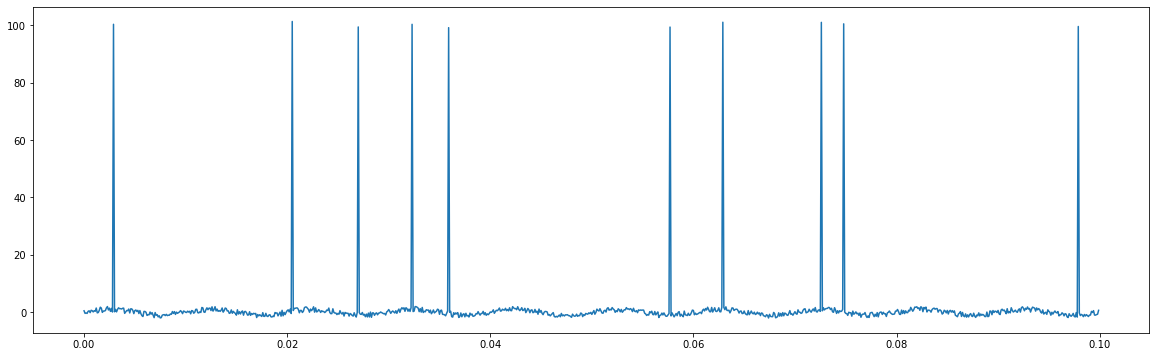

In [44]:
def mojeFsumPulse(Amp, tvec, n_length,NumPulse):
    pozPulse=np.floor(np.random.rand(NumPulse)*n_length)+1;
    AmpvalsPulses = np.zeros(tvec.size)
    AmpvalsPulses[pozPulse.astype(int)] = Amp*100;
    Err = Amp*(2*np.random.rand(tvec.size)-1) + AmpvalsPulses
    return np.array(Err)

Amp=1.0;

numT=10;
f = 100;
A0=1.0;
T=1/f;
Tmax = numT*T;
NumPulse=10;
n_length = int(numT*f);
tvec = np.linspace(0,Tmax,n_length, endpoint=False);

mojeF = mojeFunkce(f,tvec) + mojeFsumPulse(Amp, tvec, n_length,NumPulse)

plt.rcParams["figure.figsize"] = (20,6)
plt.plot(tvec,mojeF);